#  IN3050/IN4050 Mandatory Assignment 1: Traveling Salesman Problem


## Rules
Before you begin the exercise, review the rules at this website:
https://www.uio.no/english/studies/examinations/compulsory-activities/mn-ifi-mandatory.html
(This is an individual assignment. You are not allowed to deliver together or copy/share source-code/answers
with others.)

Especially, notice that you are **not allowed to use code or parts of code written by others** in your submission. We do check your code against online repositories, so please be sure to **write all the code yourself**. Read also the "Routines for handling suspicion of cheating and attempted cheating at the University of Oslo": https://www.uio.no/english/studies/examinations/cheating/index.html By submitting this assignment, you confirm that you are familiar with the rules and the consequences of breaking them.

### Delivery

**Deadline**: Friday, February 25 2022, 23:59

Your submission should be delivered in Devilry. You may redeliver in Devilry before the deadline, but include all files in the last delivery, as only the last delivery will be read. You are recommended to upload preliminary versions hours (or days) before the final deadline.

### What to deliver?

You are recommended to solve the exercise in a Jupyter notebook, but you might solve it in a Python program if you prefer.

If you choose Jupyter, you should deliver the notebook. You should answer all questions and explain what you are doing in Markdown. Still, the code should be properly commented. The notebook should contain results of your runs. In addition, you should make a pdf of your solution which shows the results of the runs.

If you prefer not to use notebooks, you should deliver the code, your run results, and a pdf-report where you answer all the questions and explain your work.

Your report/notebook should contain your name and username.

Deliver one single zipped folder (.zip, .tgz or .tar.gz) which contains your complete solution.

Important: if you weren’t able to finish the assignment, use the PDF report/Markdown to elaborate on what you’ve tried and what problems you encountered. Students who have made an effort and attempted all parts of the assignment will get a second chance even if they fail initially. This exercise will be graded PASS/FAIL.

## Introduction
In this exercise, you will attempt to solve an instance of the traveling salesman problem (TSP) using different
methods. The goal is to become familiar with evolutionary algorithms and to appreciate their effectiveness on a
difficult search problem. You may use whichever programming language you like, but we strongly suggest that
you try to use Python, since you will be required to write the second assignment in Python. You must write
your program from scratch (but you may use non-EA-related libraries).


|  &nbsp;   | Barcelona | Belgrade |  Berlin | Brussels | Bucharest | Budapest |
|:---------:|:---------:|:--------:|:-------:|:--------:|:---------:|:--------:|
| Barcelona |     0     |  1528.13 | 1497.61 |  1062.89 |  1968.42  |  1498.79 |
|  Belgrade |  1528.13  |     0    |  999.25 |  1372.59 |   447.34  |  316.41  |
|   Berlin  |  1497.61  |  999.25  |    0    |  651.62  |  1293.40  |  1293.40 |
|  Brussels |  1062.89  |  1372.59 |  651.62 |     0    |  1769.69  |  1131.52 |
| Bucharest |  1968.42  |  447.34  | 1293.40 |  1769.69 |     0     |  639.77  |
|  Budapest |  1498.79  |  316.41  | 1293.40 |  1131.52 |   639.77  |     0    |


<center>Figure 1: First 6 cities from csv file.</center>


## Problem
The traveling salesman, wishing to disturb the residents of the major cities in some region of the world in
the shortest time possible, is faced with the problem of finding the shortest tour among the cities. A tour
is a path that starts in one city, visits all of the other cities, and then returns to the starting point. The
relevant pieces of information, then, are the cities and the distances between them. In this instance of the
TSP, a number of European cities are to be visited. Their relative distances are given in the data file, *european_cities.csv*, found in the zip file with the mandatory assignment.

(You will use permutations to represent tours in your programs. If you use Python, the **itertools** module provides
a permutations function that returns successive permutations, this is useful for exhaustive search)

## Helper code for visualizing solutions

Here follows some helper code that you can use to visualize the plans you generate. These visualizations can **help you check if you are making sensible tours or not**. The optimization algoritms below should hopefully find relatively nice looking tours, but perhaps with a few visible inefficiencies.

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
#Map of Europe
europe_map =plt.imread('map.png')

#Lists of city coordinates
city_coords={"Barcelona":[2.154007, 41.390205], "Belgrade": [20.46,44.79], "Berlin": [13.40,52.52], "Brussels":[4.35,50.85],"Bucharest":[26.10,44.44], "Budapest": [19.04,47.50], "Copenhagen":[12.57,55.68], "Dublin":[-6.27,53.35], "Hamburg": [9.99, 53.55], "Istanbul": [28.98, 41.02], "Kiev": [30.52,50.45], "London": [-0.12,51.51], "Madrid": [-3.70,40.42], "Milan":[9.19,45.46], "Moscow": [37.62,55.75], "Munich": [11.58,48.14], "Paris":[2.35,48.86], "Prague":[14.42,50.07], "Rome": [12.50,41.90], "Saint Petersburg": [30.31,59.94], "Sofia":[23.32,42.70], "Stockholm": [18.06,60.33],"Vienna":[16.36,48.21],"Warsaw":[21.02,52.24]}

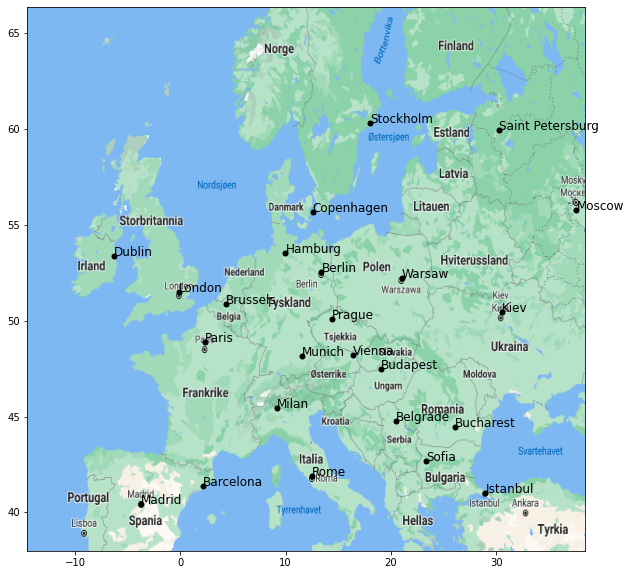

In [3]:
#Helper code for plotting plans
#First, visualizing the cities.
import csv
with open("european_cities.csv", "r") as f:
    data = list(csv.reader(f, delimiter=';'))
    cities = data[0]
    
fig, ax = plt.subplots(figsize=(10,10))

ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")



# Map (long, lat) to (x, y) for plotting
for city,location in city_coords.items():
    x, y = (location[0], location[1])
    plt.plot(x, y, 'ok', markersize=5)
    plt.text(x, y, city, fontsize=12);

In [4]:
#A method you can use to plot your plan on the map.
def plot_plan(city_order):
    fig, ax = plt.subplots(figsize=(10,10))
    ax.imshow(europe_map, extent=[-14.56,38.43, 37.697 +0.3 , 64.344 +2.0], aspect = "auto")

    # Map (long, lat) to (x, y) for plotting
    for index in range(len(city_order) -1):
        current_city_coords = city_coords[city_order[index]]
        next_city_coords = city_coords[city_order[index+1]]
        x, y = current_city_coords[0], current_city_coords[1]
        #Plotting a line to the next city
        next_x, next_y = next_city_coords[0], next_city_coords[1]
        plt.plot([x,next_x], [y,next_y])
        
        plt.plot(x, y, 'ok', markersize=5)
        plt.text(x, y, index, fontsize=12);
    #Finally, plotting from last to first city
    first_city_coords = city_coords[city_order[0]]
    first_x, first_y = first_city_coords[0], first_city_coords[1]
    plt.plot([next_x,first_x],[next_y,first_y])
    #Plotting a marker and index for the final city
    plt.plot(next_x, next_y, 'ok', markersize=5)
    plt.text(next_x, next_y, index+1, fontsize=12);

['Barcelona', 'Belgrade', 'Berlin', 'Brussels', 'Bucharest', 'Budapest', 'Copenhagen', 'Dublin', 'Hamburg', 'Istanbul', 'Kiev', 'London', 'Madrid', 'Milan', 'Moscow', 'Munich', 'Paris', 'Prague', 'Rome', 'Saint Petersburg', 'Sofia', 'Stockholm', 'Vienna', 'Warsaw']


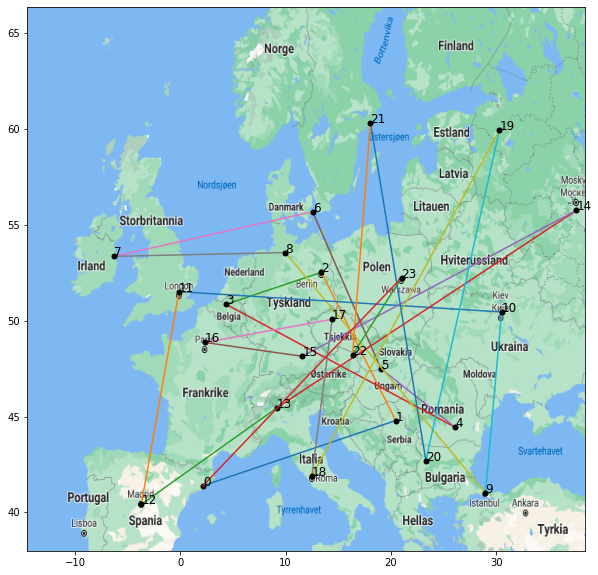

In [5]:
#Example usage of the plotting-method.
plan = list(city_coords.keys()) # Gives us the cities in alphabetic order
print(plan)
plot_plan(plan)

## Exhaustive Search
First, try to solve the problem by inspecting every possible tour. Start by writing a program to find the shortest
tour among a subset of the cities (say, **6** of them). Measure the amount of time your program takes. Incrementally
add more cities and observe how the time increases. Plot the shortest tours you found using the plot_plan method above, for 6 and 10 cities.

Time: 0.0037991250000004584
('Barcelona', 'Belgrade', 'Bucharest', 'Budapest', 'Berlin', 'Brussels')
Distance: 5018.8099999999995
Time: 16.098786374999996
('Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin')
Distance: 7486.309999999999


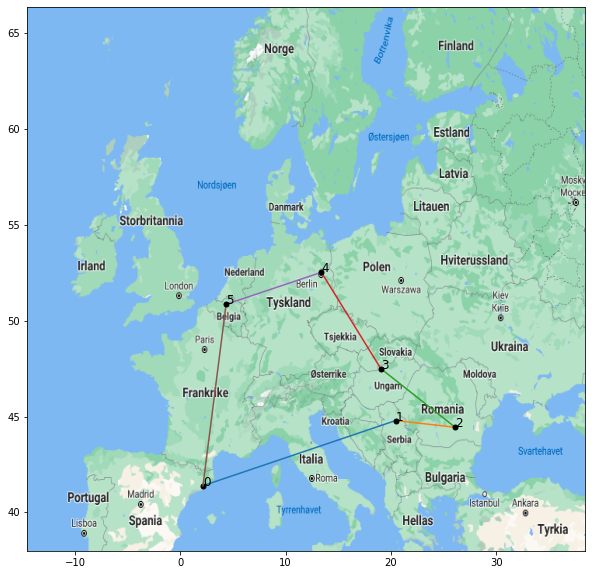

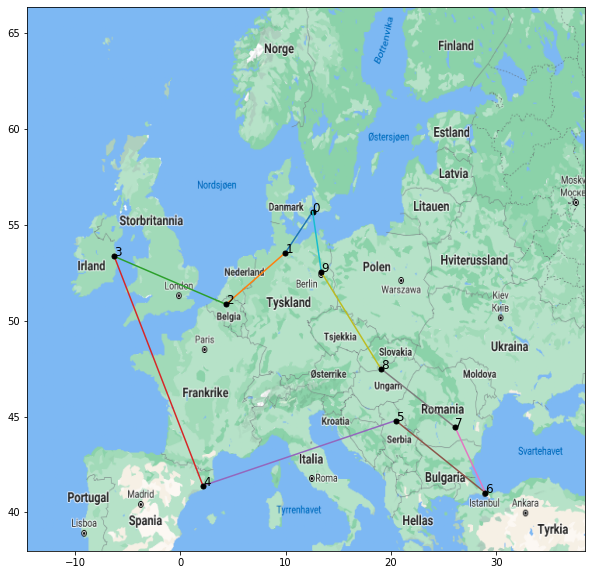

In [6]:
from itertools import permutations
import time

def calc_distance(tuple):
    #navigate to row of previous city, find column of new city: distance between previous city and current
        #data[row][column]
        distance = 0
        row = 0
        column = 0
        start_city = None
        prev_city = None
        for city in tuple:
            if prev_city == None:
                start_city = city
                column = data[0].index(city)
                row = column+1
            column = data[0].index(city)
            distance += float(data[row][column])
            prev_city = city
            row = column+1 
            if city == tuple[-1]:
                column = data[0].index(start_city)
                distance += float(data[row][column])
        return distance
    
def exhaustive_search(to_visit):
    tic = time.perf_counter()
    perms = permutations(list(to_visit))
    best_perm = ()
    dist = None

    for tup in perms:
        #Calculate total distance in tuple: if better update best
        total_distance = 0.0
        total_distance = calc_distance(tup)
        if dist == None:
            best_perm = tup
            dist = total_distance
        else:
            if total_distance < dist:
                best_perm = tup
                dist = total_distance     
    
    toc = time.perf_counter()
    print("Time:", toc-tic)
    return best_perm, dist

order, dist = exhaustive_search(plan[:6])
print(order)
print("Distance:", dist)
plot_plan(order)
    
order, dist = exhaustive_search(plan[:10])
print(order)
print("Distance:", dist)
plot_plan(order)
#0.002524499999708496 for 6 cities
#15.547676833004516 for 10 cities

What is the shortest tour (i.e., the actual sequence of cities, and its length) among the first 10 cities (that is,
the cities starting with B,C,D,H and I)? How long did your program take to find it? Calculate an approximation of how long it would take to perform exhaustive search on all 24 cities?

In [ ]:
"""
The shortest tour of the first 10 cities: 
    'Copenhagen', 'Hamburg', 'Brussels', 'Dublin', 'Barcelona', 'Belgrade', 'Istanbul', 'Bucharest', 'Budapest', 'Berlin'
    Distance: 7486.309999999999
    According to Visual Studio Code: approximately 16,6 seconds.   
    
Following this pattern:
    Going from 10(10! = 3 628 800) to 11(11! = 39 916 800) cities took about 3,5 minutes, adding more than 3 minutes. 24(24! = 6,204484017E23) cities will take too long with exhaustive search, because of exponential growth in amount of permutations
""" 

## Hill Climbing
Then, write a simple hill climber to solve the TSP. How well does the hill climber perform, compared to the result from the exhaustive search for the first **10 cities**? Since you are dealing with a stochastic algorithm, you
should run the algorithm several times to measure its performance. Report the length of the tour of the best,
worst and mean of 20 runs (with random starting tours), as well as the standard deviation of the runs, both with the **10 first cities**, and with all **24 cities**. Plot one of the the plans from the 20 runs for both 10 cities and 24 cities (you can use plot_plan). 

In [ ]:

def swap(tuple):
    #Swap tuple[1] through range
    all_swaps = []
    copy = list(tuple.copy())
    for i in range(1, len(copy)):
        if i < len(copy)-1:
            next = copy[i+1]
        copy[copy.index(next)] = copy[i]
        copy[i] = next
        all_swaps.append(copy.copy())
    return all_swaps

def hill_climb(to_visit):
    tic = time.perf_counter()
    best_perm = np.random.permutation(list(to_visit))
    best_dist = calc_distance(best_perm)
    
    current_dist = 0
    current_perm = best_perm
        
    while (current_dist < best_dist):
        if current_dist != 0:
            best_dist = current_dist
        best_perm = current_perm
        swaps = swap(best_perm)
        for copy in swaps:
            swap_distance = calc_distance(copy)
            if current_dist == 0:
                current_dist = swap_distance
                current_perm = copy
            else:
                if swap_distance < current_dist:
                    current_dist = swap_distance
                    current_perm = copy
    
    toc = time.perf_counter()
    print("Time:", toc-tic)
    return best_perm, best_dist

order, dist = hill_climb(plan[:10])
print(order)
print("Distance:", dist)
plot_plan(order)

#Best run: 7486
#Worst run: 13033
#Average: 9639
#True best: 7486
#Standard deviation: 1303
#Mean deviation: 1021,15
#On average, hill climbing gets worse solution and deviations can be big. But, since the algorith is quicker we can run in multiple times and get a good result.

order, dist = hill_climb(plan[:24])
print(order)
print("Distance:", dist)
plot_plan(order)

#Best run: 15634
#Worst run: 31786
#Average: 23636
#True best: Unknown, since exhaustive search will take too long.
#Standard deviation: 4542
#Mean deviation: 3346,05
#On average, hill climbing gets worse solution and deviations can be big. But, since the algorith is quicker we can run in multiple times and get a good result.

#On the plot we can sometimes see lines crossing. This tells us that the algorithm gets stuck. This is because if one shuffle does not give a better result, we stop.

## Genetic Algorithm
Next, write a genetic algorithm (GA) to solve the problem. Choose mutation and crossover operators that are appropriate for the problem (see chapter 4.5 of the Eiben and Smith textbook). Choose three different values for the population size. Define and tune other parameters yourself and make assumptions as necessary (and report them, of course).

For all three variants: As with the hill climber, report best, worst, mean and standard deviation of tour length out of 20 runs of the algorithm (of the best individual of last generation). Also, find and plot the average fitness of the best fit individual in each generation (average across runs), and include a figure with all three curves in the same plot in the report. Conclude which is best in terms of tour length and number of generations of evolution
time.

Finally, plot an example optimized tour (the best of the final generation) for the three different population sizes, using the plot_plan method.

In [ ]:
import random

def mutate(ind):
    #swaps two genes as a mutation
    individual = list(ind)
    swap_gene = individual.pop(individual.index(random.choice(individual)))
    random_gene = random.choice(individual)
    individual.insert(individual.index(random_gene)+1, swap_gene)
    return individual
    
def crossover(par1, par2):
    p1 = list(par1)
    p2 = list(par2)
    child1 = [None] * len(p1)
    child2 = [None] * len(p2)
    genotype_p1 = None
    genotype_p2 = None
    start = random.randint(0, len(p1)-1)
    end = random.randint(1, len(p2)-1)
    #to make sure we get at least 2 elements
    while start == end:
        end = random.randint(1, len(p1)-1)
    #make sure start is before end
    if start > end:
        new_start = end
        end = start
        start = new_start
    #select genotype to swap
    genotype_p1 = p1.copy()[start:end]
    genotype_p2 = p2.copy()[start:end]
    #add slices to children
    for gene in genotype_p1:
        locus = p1.index(gene)
        child1[locus] = gene
        child2[locus] = p2[locus]
    #add remaining slice from p2 in child1
    for gene in genotype_p1:
        locus = p1.index(gene)
        if p2[locus] not in child1:
            locus = p2.index(child1[locus])
            while child1[locus] != None:
                locus = p2.index(child1[locus])
            child1[locus] = p2[p1.index(gene)]
    for gene in p2:
        if gene not in child1:
            child1[p2.index(gene)] = gene
    for gene in p1:
        if gene not in child1:
            child1[p1.index(gene)] = gene 
    #repeat for child 2
    for gene in genotype_p2:
        locus = p2.index(gene)
        if p1[locus] not in child2:
            locus = p1.index(child2[locus])
            while child2[locus] != None:
                locus = p1.index(child2[locus])
            child2[locus] = p1[p2.index(gene)]
    for gene in p1:
        if gene not in child2:
            child2[p1.index(gene)] = gene   
    for gene in p2:
        if gene not in child2:
            child2[p1.index(gene)] = gene  
    return child1, child2    
                                
def tournament(pop):
    population = list(pop)
    better_population = []
    while len(population) > 1:
        #find random opponents and choose whichever has shortest distance as winner
        opp1 = population.pop(random.randint(0, len(population)-1))
        opp2 = population.pop(random.randint(0, len(population)-1))
        if calc_distance(opp1) < calc_distance(opp2):
            better_population.append(opp1)
        elif calc_distance(opp1) >= calc_distance(opp2):
            better_population.append(opp2)
        #must be 2 remaining parents for the last match, else add to better_population
        if len(population) == 1:
            better_population.append(pop[0])
    return better_population
    
def ea(to_visit, pop_size):
    tic = time.perf_counter()
    #Population
    #perms = list(permutations(list(to_visit)))
    population = []
    #Population init.
    for i in range(pop_size):
        new = np.random.permutation(list(to_visit))#list(perms.pop(random.randint(0, len(perms)-1)))
        population.append(list(new))
    generation = 0
    
    best_ind = population[0]
    best_dist = calc_distance(best_ind)
    y_line = []
    x_line = []
    population = tournament(population)
    while (generation < 500):
        #print(len(population))
        #1.select parents (tournament), and then replace with new random permutation
        for i in range(int(pop_size/2)):
            new = np.random.permutation(list(to_visit)) #list(perms.pop(random.randint(0, len(perms)-1)))
            population.append(new)
        population = tournament(population)
        #2.crossover 2 random parents for exploration. As population evolves, we will get more similiar solutions and therefore exploitation.
        #add best parent, for diversity, and best child
        population_crossover = []
        while len(population) > 1:
            rand1 = population.pop(random.randint(0, len(population)-1))
            rand2 = population.pop(random.randint(0, len(population)-1))
            if calc_distance(rand1) < calc_distance(rand2):
                population_crossover.append(rand1)
            else:
                population_crossover.append(rand2)
            child1, child2 = crossover(rand1, rand2)
            if calc_distance(child1) < calc_distance(child2):
                population_crossover.append(child1)
            else:
                population_crossover.append(child2)
        #if one individual remains, we carry them over to next generation
        if len(population) != 0:
            population_crossover.append(population.pop())
        population = population_crossover
        #3.mutate population
        population_mutated = []
        for ind in population:
            population_mutated.append(mutate(ind))
        population = population_mutated
        #find best individual in population
        for ind in population:
            ea_current_dist = calc_distance(ind)
            if ea_current_dist < best_dist:
                best_dist = ea_current_dist 
            x_line.append(generation)
            y_line.append(best_dist)
        #4.increase generation
        generation += 1   
    toc = time.perf_counter()
    print("Time:", toc-tic)
    return best_ind, best_dist, x_line, y_line

order, dist, x, y = ea(plan[:24], 50)
print(order)
print("Distance:", dist)
plot_plan(order)
plt.figure()
plt.plot(x, y)

order, dist, x, y = ea(plan[:24], 100)
print(order)
print("Distance:", dist)
plot_plan(order)
plt.figure()
plt.plot(x, y)

order, dist, x, y = ea(plan[:24], 200)
print(order)
print("Distance:", dist)
plot_plan(order)
plt.figure()
plt.plot(x, y)

#All runs find a solution that is the shortest distance, or almost shortest distance.
#However, loooking at the plots on the map we see that the route crosses itself multiple times.
#All functions seem to be working correctly, therefore I am unsure why the route crosses itself over.
#Since the function return almost the same runs for all population sizes above, I did not write deviatons since there barely is any.
#Best run for 10 citites:7486,30999. Worst run for 10 cities:7503.1.
#Deviation for 24 cities:1317.3

Among the first 10 cities, did your GA find the shortest tour (as found by the exhaustive search)? Did it come close? 

For both 10 and 24 cities: How did the running time of your GA compare to that of the exhaustive search? 

How many tours were inspected by your GA as compared to by the exhaustive search?

In [ ]:
"""
The GA found the shortes tour, or came close every time.
The running time was great, for 24 cities and 200 population size it took 6.8 seconds.
I found that the larger the population, the earlier in the generation I could find the optimal solution.
For 10 cities, exhaustive search had to check 10!. For 10 cities with a population size of 200 and 500 generations, we searched 100 000 possibilites. A difference of over 3 500 000.
"""